<a href="https://colab.research.google.com/github/mahatalakshmi/mahatalakshmi/blob/main/gold_pridict_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

DATA SET

In [37]:
gold_data=pd.read_csv('/content/gld_price_data.csv')

printing 1st 5 rows in data set

In [6]:
gold_data.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


printing last  rows in data set

In [7]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


printing no of cooums and rows

In [9]:
gold_data.shape

(2290, 6)

some extra info

In [10]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


printing any nulls values present in it

In [11]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

statastical values 

In [12]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


correleation
1)postive
2)negative

In [13]:
correlation = gold_data.corr()

ploting the correlation 

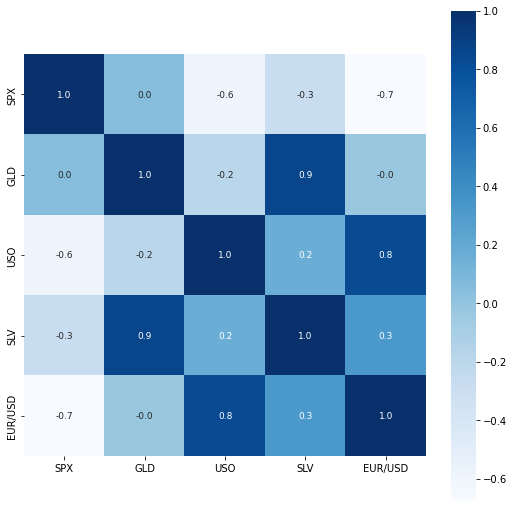

In [16]:
plt.figure(figsize=(9,9))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':9}, cmap='Blues')

In [17]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


density graph

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


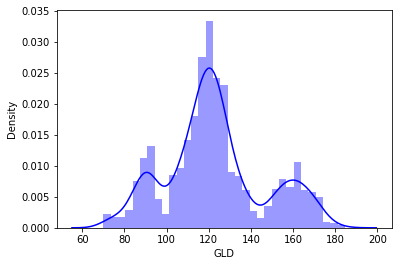

In [18]:
sns.distplot(gold_data['GLD'],color='blue')

deteing some coulums and replacing in other variable

In [21]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD'] 

In [22]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [23]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting into training and testiong sets

In [26]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)


Randon forest regression model using for preidiction

In [27]:
regressor=RandomForestRegressor(n_estimators=100)

In [28]:
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [29]:
test_data_prediction=regressor.predict(X_test)

In [30]:
print(test_data_prediction)

[168.59629943  81.79069986 116.05579996 127.60310053 120.59230141
 154.7960974  150.37679901 126.13290027 117.49019881 125.93670068
 116.93350106 172.02450056 141.56639912 167.86309825 115.09680009
 117.56290061 138.37960359 170.17030083 159.3873031  158.28860005
 155.13469977 124.89410046 175.24909999 156.9981032  125.09410074
  93.7404994   77.09140028 120.83120018 119.05439948 167.49249952
  88.17559975 125.1300003   91.27510089 117.69650005 121.14839904
 136.57600089 115.3637013  115.31140072 148.13370041 107.28660121
 104.79080251  87.39519812 126.51580037 117.85690034 153.75869904
 119.52160027 108.24879988 108.26979812  93.2591005  126.94699836
  75.32450006 113.74459895 121.4958003  111.33959914 118.8710989
 120.78509915 159.83790046 168.53200149 147.10239733  85.73789851
  94.3517003   86.78559896  90.59060041 118.70200083 126.46400094
 127.3894002  169.90560006 122.23209946 117.51469906  98.46410047
 168.3451012  142.9823986  132.17940311 121.29150207 121.01949929
 119.890900

checing efficiency or error rate

In [31]:
error_score=metrics.r2_score(Y_test,test_data_prediction)

In [32]:
print(error_score)

0.9889507743268302


In [33]:
Y_test=list(Y_test)

ploting to check erroe(your wish) only to check hoe huch it is varying

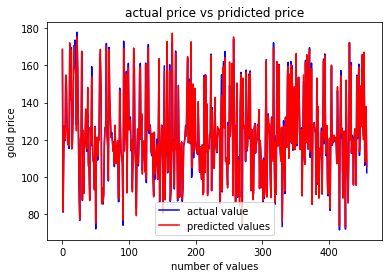

In [36]:
plt.plot(Y_test,color='blue',label='actual value')
plt.plot(test_data_prediction,color="red",label='predicted values')
plt.title('actual price vs pridicted price')
plt.xlabel('number of values')
plt.ylabel('gold price')
plt.legend()
plt.show()